In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [3]:
data = np.load('R2192_models/simple_activity_R2192_1x1400_v1_new.npz')
activations = data['activations']
print("activations:", activations.shape , np.min(activations), np.max(activations), np.mean(activations))
targets = data['targets']
print("targets:", targets.shape,np.min(targets, axis=0), np.max(targets,axis=0))

activations: (4414, 512) -1.0 1.0 0.0029829397699952707
targets: (4414, 2) [6.05123 4.39033] [107.044 105.181]


In [4]:
length_of_fold=441
start_of_fold=442*2

targets_of_fold = data["targets"][start_of_fold:start_of_fold+length_of_fold]
activations_of_fold = data["activations"][start_of_fold:start_of_fold+length_of_fold]

#Different mappings of location to value

near_wall = []
for i in range(len( targets_of_fold)):
    if targets_of_fold[i,0]<20 or targets_of_fold[i,0]>90 or targets_of_fold[i,1]<20 or targets_of_fold[i,1]>90:
        near_wall.append(1)
    else:
        near_wall.append(0)
        

top_lim=95
bottom_lim=15
        
near_which_wall = []
for i in range(len(targets_of_fold)):
    if (targets_of_fold[i,0]<bottom_lim and targets_of_fold[i,1]<bottom_lim) or (targets_of_fold[i,0]<bottom_lim and targets_of_fold[i,1]>top_lim) or (targets_of_fold[i,0]>top_lim and targets_of_fold[i,1]<bottom_lim) or(targets_of_fold[i,0]>top_lim and targets_of_fold[i,1]>top_lim):
        near_which_wall.append("black")
    elif targets_of_fold[i,0]<bottom_lim:
        near_which_wall.append("red")
    elif targets_of_fold[i,0]>top_lim:
        near_which_wall.append("cyan")
    elif targets_of_fold[i,1]<bottom_lim:
        near_which_wall.append("green")
    elif targets_of_fold[i,1]>top_lim:
        near_which_wall.append("yellow")
    else:
        near_which_wall.append("white")


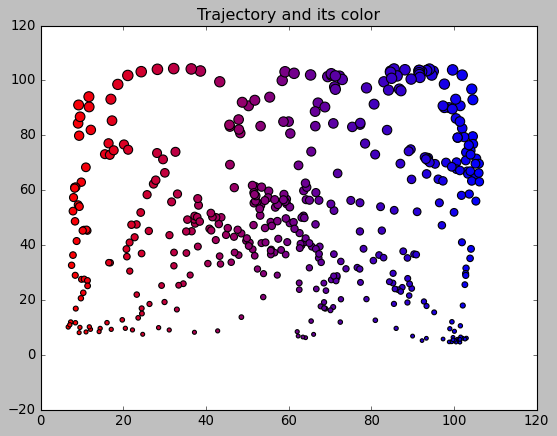

In [5]:

max_x = np.max(data["targets"][:,0])
min_x = np.min(data["targets"][:,0])
max_y = np.max(data["targets"][:,1])
min_y = np.min(data["targets"][:,1])
position_color=[]
sizes = []
for i in range(len(targets_of_fold)):
    x_pos = (targets_of_fold[i,0]-min_x)/(max_x-min_x)
    y_pos = (targets_of_fold[i,1]-min_y)/(max_y-min_y)
    #colr = [(1-x_pos)*y_pos,0,x_pos*y_pos]
    
    colr = np.array([(1-x_pos),0,x_pos])

    #print "coord ",data["targets"][i,:]," assigned color", colr
    position_color.append(colr)
    sizes.append(10+y_pos*80)
    
#test position color
plt.scatter(targets_of_fold[:,0], targets_of_fold[:,1], c=position_color, s=sizes)
plt.title("Trajectory and its color")
plt.savefig("colored_XY.png")


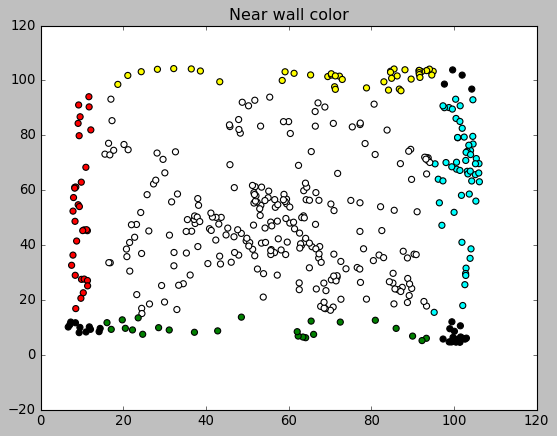

In [6]:

plt.clf()
plt.scatter(targets_of_fold[:,0], targets_of_fold[:,1], c=near_which_wall, s=30)
plt.title("Near wall color")
plt.savefig("colored_walls.png")


(4414, 2)


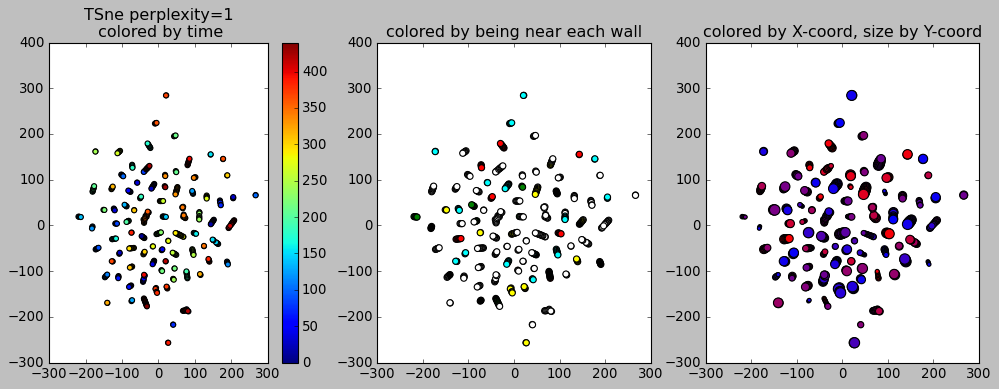

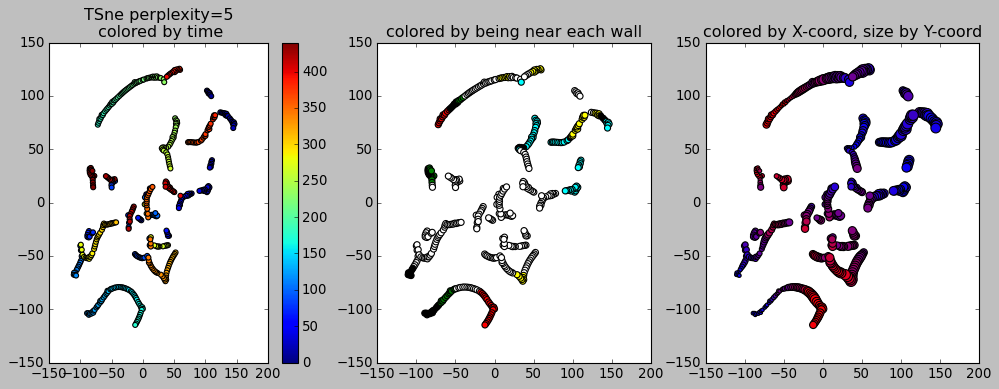

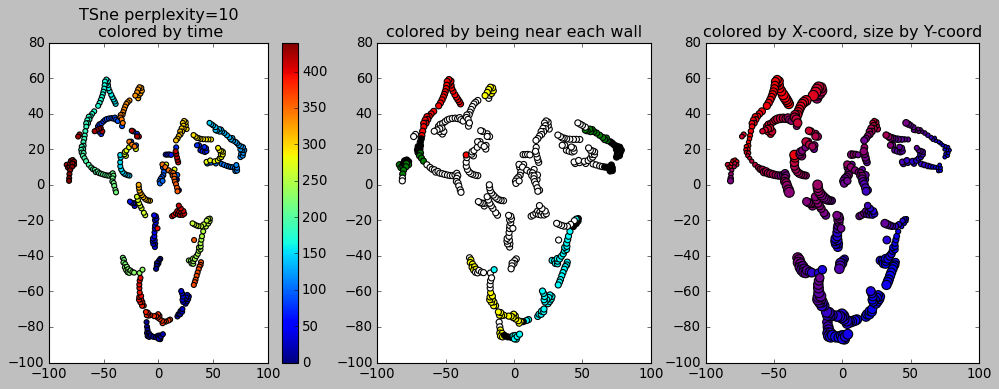

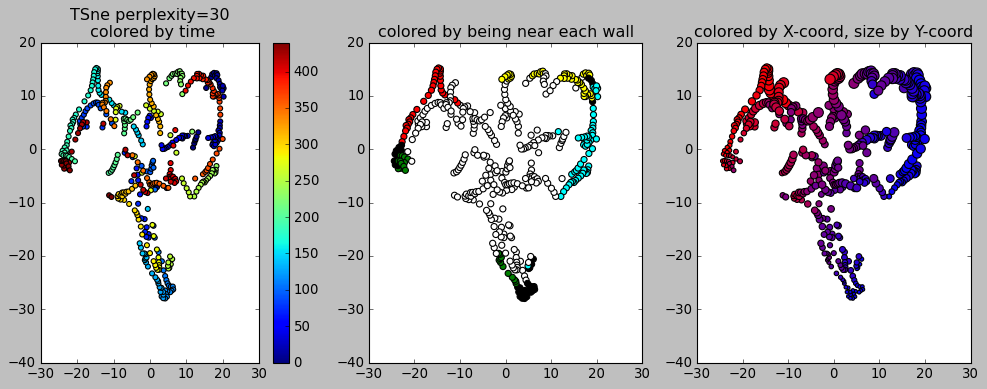

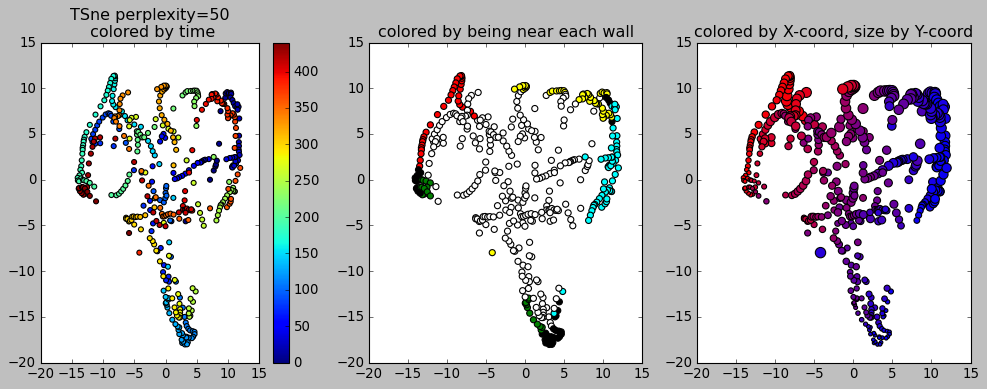

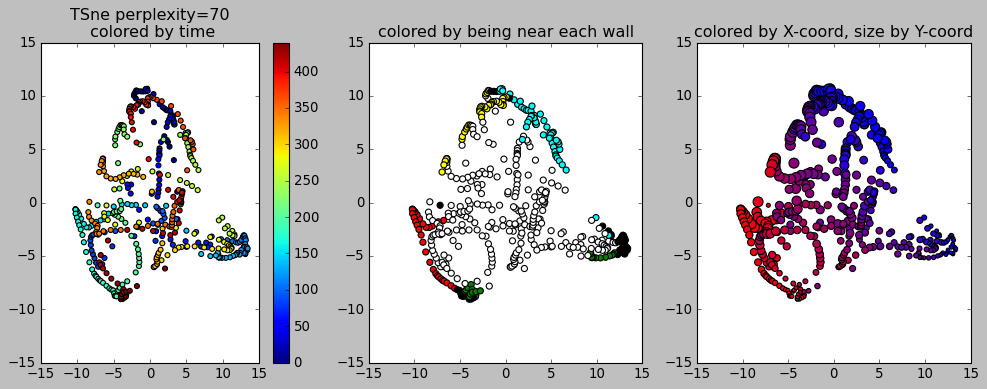

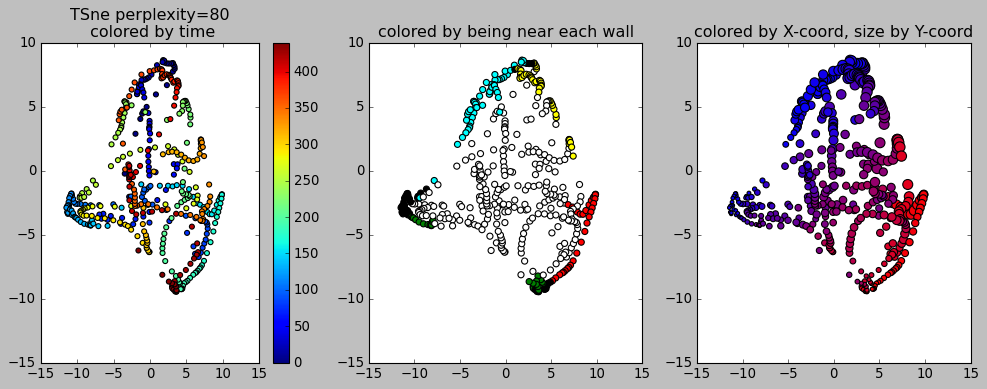

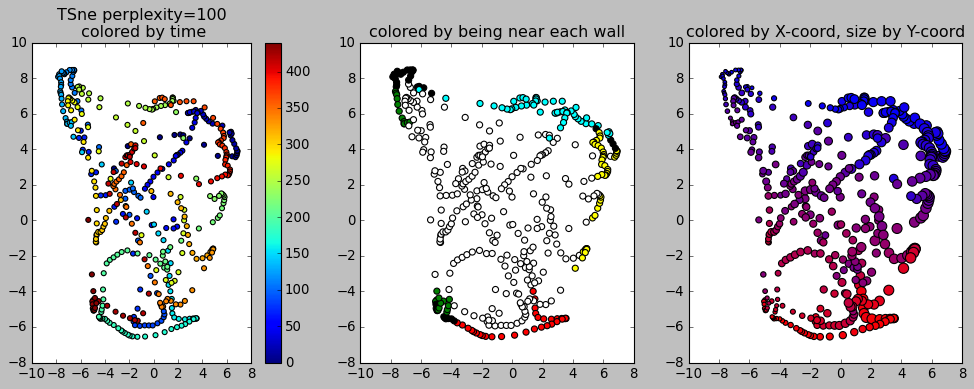

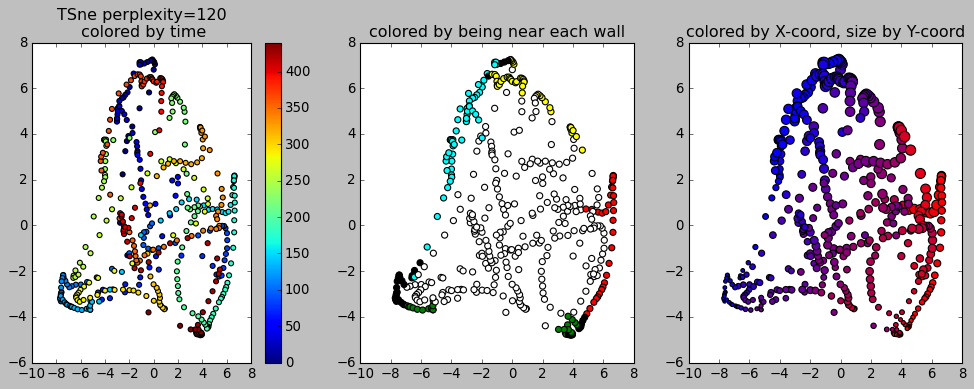

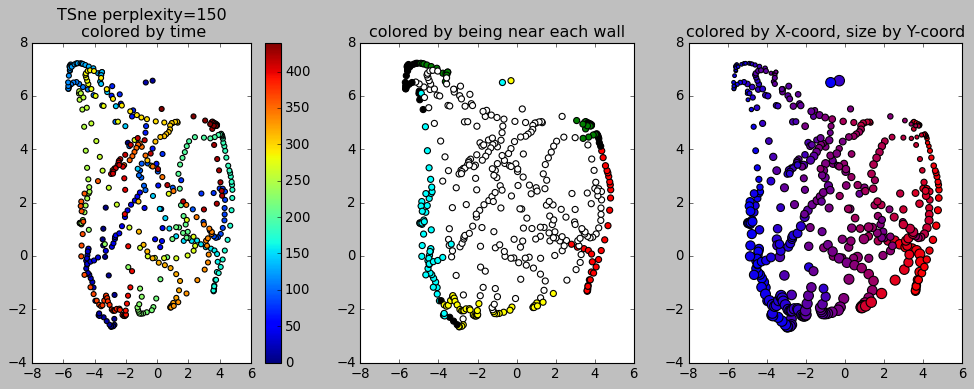

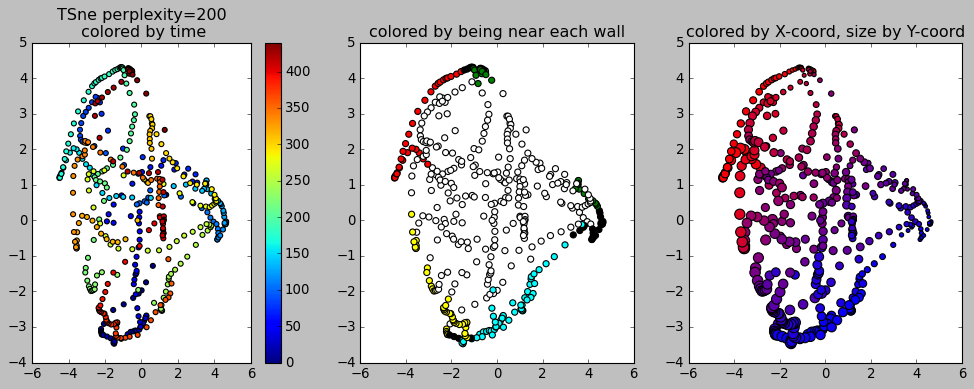

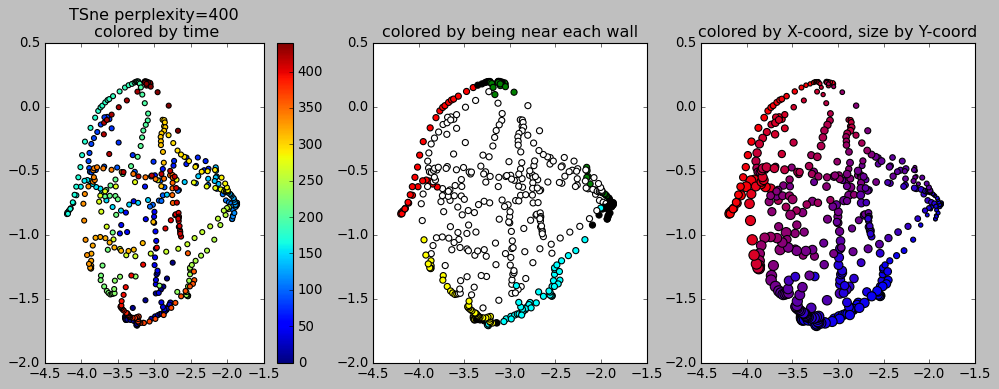

In [7]:
from sklearn.manifold import TSNE

activations_from_one_CV_model = data["activations"][start_of_fold:start_of_fold+length_of_fold,:]
targets_from_one_CV_model = data["targets"][start_of_fold:start_of_fold+length_of_fold,:]
#assert np.all(activations_of_fold==activations_from_one_CV_model)

print(np.shape(data["targets"]))


for perplexity in [1,5,10, 30, 50, 70 ,80, 100, 120, 150, 200, 400]:
    activations_embedded_2D = TSNE(n_components=2, perplexity=perplexity,n_iter=10000).fit_transform(activations_from_one_CV_model)
    #activations_embedded_2D = TSNE(n_components=2).fit_transform(all_activations_list[0])
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=np.arange(length_of_fold))
    plt.title("TSne perplexity="+str(perplexity)+ "\n colored by time")
    plt.colorbar()
    
    plt.subplot(132)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=near_which_wall, s=30)
    plt.title("colored by being near each wall")
    
    plt.subplot(133)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=position_color, s=sizes)
    plt.title("colored by X-coord, size by Y-coord")
    plt.show()

    

<Figure size 640x480 with 0 Axes>

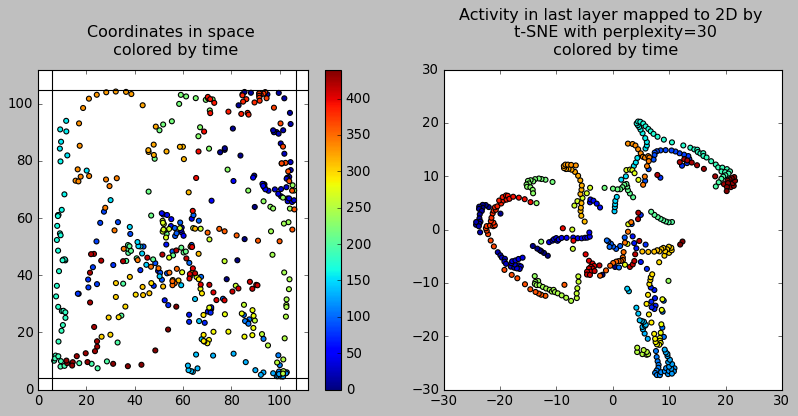

<Figure size 640x480 with 0 Axes>

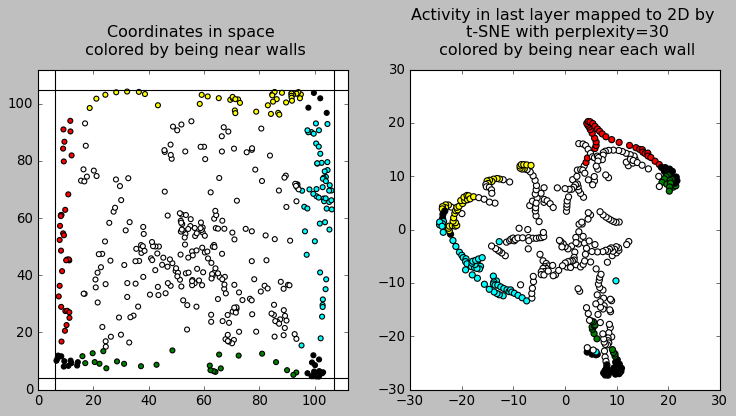

<Figure size 640x480 with 0 Axes>

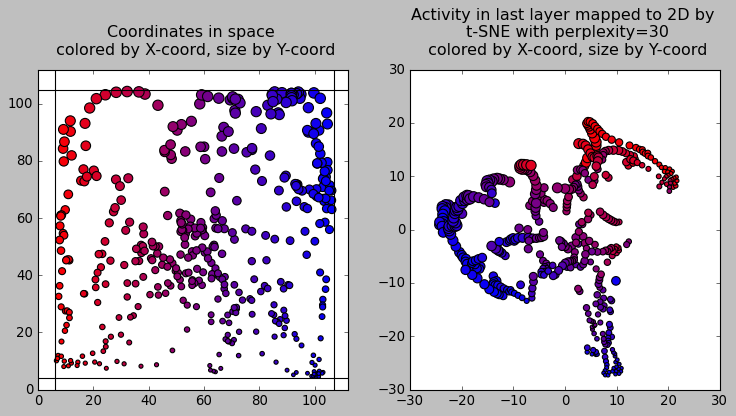

<Figure size 640x480 with 0 Axes>

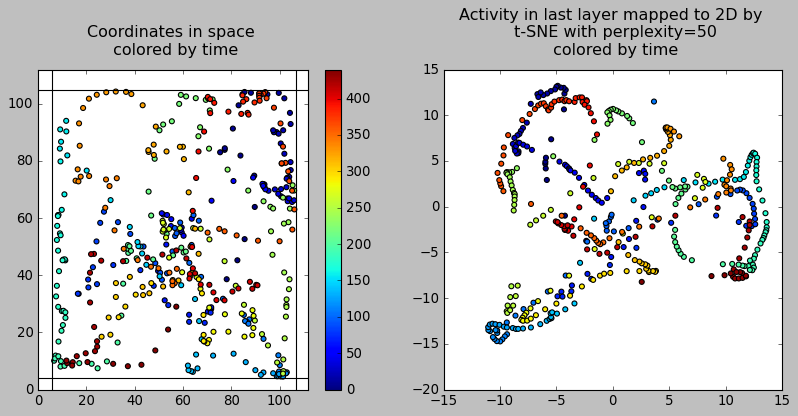

<Figure size 640x480 with 0 Axes>

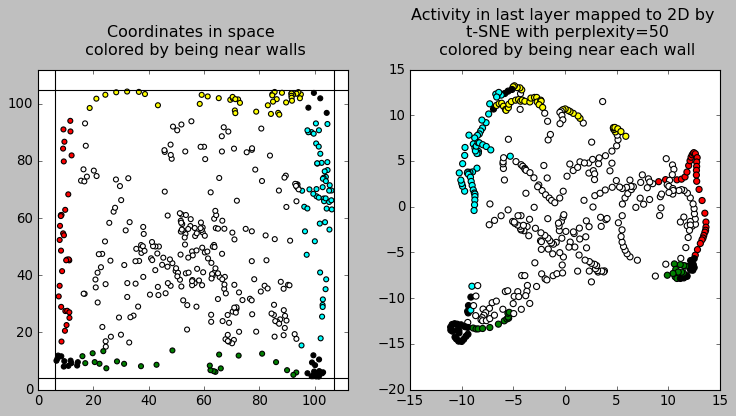

<Figure size 640x480 with 0 Axes>

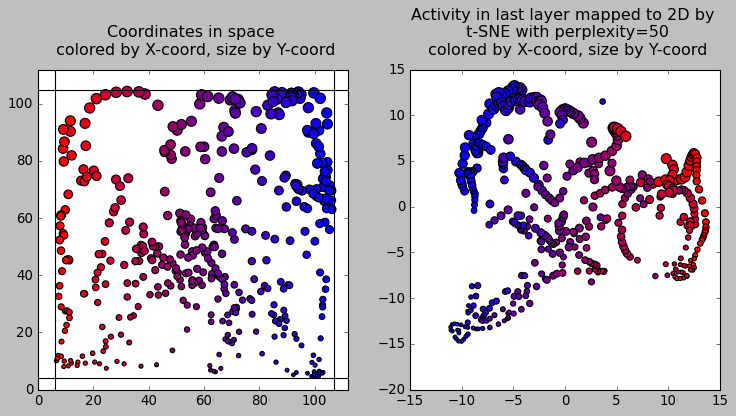

<Figure size 640x480 with 0 Axes>

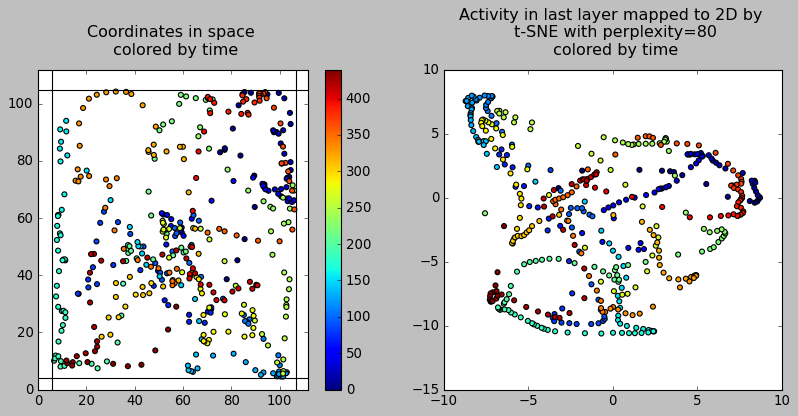

<Figure size 640x480 with 0 Axes>

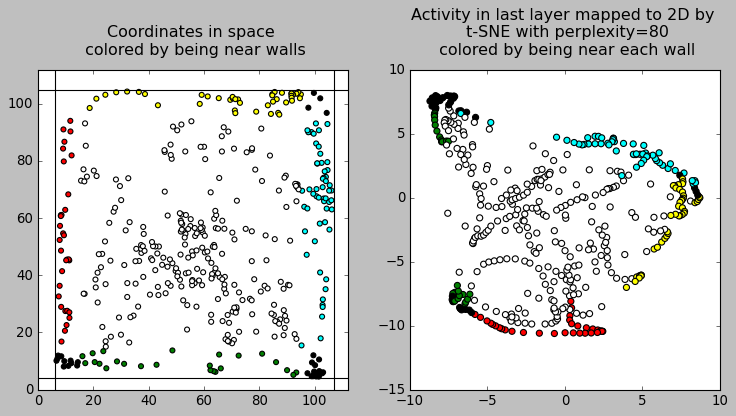

<Figure size 640x480 with 0 Axes>

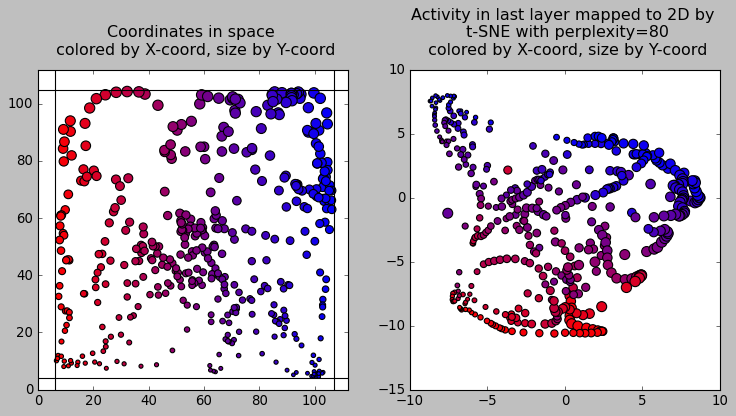

In [8]:
data_of_fold= data["targets"][start_of_fold:start_of_fold+length_of_fold]

for perplexity in [30, 50, 80]:
    activations_embedded_2D = TSNE(n_components=2, perplexity=perplexity,n_iter=10000).fit_transform(activations_from_one_CV_model)
    plt.clf()
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.scatter(data_of_fold[:,0], data_of_fold[:,1], c=np.arange(441))
    plt.axhline(y=4,color="black")
    plt.axhline(y=105,color="black")
    plt.axvline(x=6,color="black")
    plt.axvline(x=107,color="black")
    plt.xlim([0,112])
    plt.ylim([0,112])
    plt.title("Coordinates in space \n colored by time",y=1.03)
    plt.colorbar()

    plt.subplot(122)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=np.arange(441))
    plt.title("Activity in last layer mapped to 2D by \n t-SNE with perplexity="+str(perplexity)+ "\n colored by time", y=1.03)
    plt.show()

    
    plt.clf()
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.scatter(data_of_fold[:,0], data_of_fold[:,1], c=near_which_wall)
    plt.axhline(y=4,color="black")
    plt.axhline(y=105,color="black")
    plt.axvline(x=6,color="black")
    plt.axvline(x=107,color="black")
    plt.xlim([0,112])
    plt.ylim([0,112])

    plt.title("Coordinates in space \n colored by being near walls",y=1.03)

    plt.subplot(122)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=near_which_wall, s=30)
    plt.title("Activity in last layer mapped to 2D by \n t-SNE with perplexity="+str(perplexity)+ "\n colored by being near each wall",y=1.03)
    plt.show()

    plt.clf()
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.scatter(data_of_fold[:,0], data_of_fold[:,1], c=position_color, s=sizes)
    plt.axhline(y=4,color="black")
    plt.axhline(y=105,color="black")
    plt.axvline(x=6,color="black")
    plt.axvline(x=107,color="black")
    plt.xlim([0,112])
    plt.ylim([0,112])
    plt.title("Coordinates in space \n colored by X-coord, size by Y-coord",y=1.03)

    plt.subplot(122)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=position_color, s=sizes)
    plt.title("Activity in last layer mapped to 2D by \n t-SNE with perplexity="+str(perplexity)+ "\n colored by X-coord, size by Y-coord",y=1.03)
    plt.show()


In [9]:
import scipy

activations_embedded_2D = TSNE(n_components=2, perplexity=50,n_iter=10000).fit_transform(activations_from_one_CV_model)
true_xy = targets_from_one_CV_model

print(np.shape(activations_embedded_2D), np.shape(true_xy))
distances_tsne = scipy.spatial.distance.pdist(activations_embedded_2D)
distances_xy = scipy.spatial.distance.pdist(true_xy)


scipy.stats.kendalltau(distances_tsne,distances_xy)


(441, 2) (441, 2)


KendalltauResult(correlation=0.6536316988949977, pvalue=0.0)

# Speed

In [10]:
# HINT
#data_of_fold= data["targets"][start_of_fold:start_of_fold+length_of_fold]
targets_of_fold_plus_one = data["targets"][start_of_fold+1:start_of_fold+length_of_fold+1]
print(targets_of_fold[:2])
print(targets_of_fold_plus_one[:2])

diff =  targets_of_fold_plus_one -targets_of_fold
speed = np.sqrt(np.sum(diff**2, axis=1))*5 #times 5 to get cm/s

speed_clipped = np.clip(speed, a_min=0, a_max=40)
print(diff[:10])
direction = np.arctan2(diff[:,1],diff[:,0]) * (180/np.pi)
print(direction[:10], np.min(direction), np.max(direction))

[[78.1368 38.6138]
 [82.5628 45.251 ]]
[[82.5628 45.251 ]
 [85.5587 52.6462]]
[[ 4.426   6.6372]
 [ 2.9959  7.3952]
 [ 4.1967 11.2643]
 [-0.2096 10.9635]
 [-5.7119  7.0235]
 [-6.5399  2.004 ]
 [-1.8767 -0.8515]
 [ 1.9328  1.4001]
 [ 3.3436  6.8958]
 [ 2.3711  8.1442]]
[  56.30276144   67.94643513   69.56629553   91.09524628  129.11992325
  162.96353688 -155.59516093   35.91917702   64.13242007   73.76762471] -179.81547229634845 178.78012732541927


<Figure size 640x480 with 0 Axes>

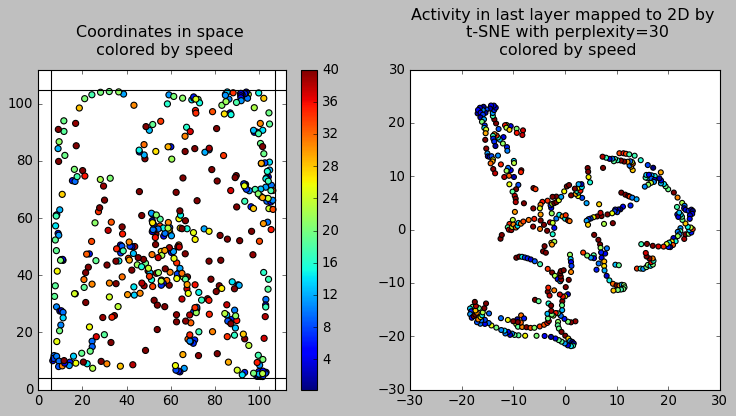

<Figure size 640x480 with 0 Axes>

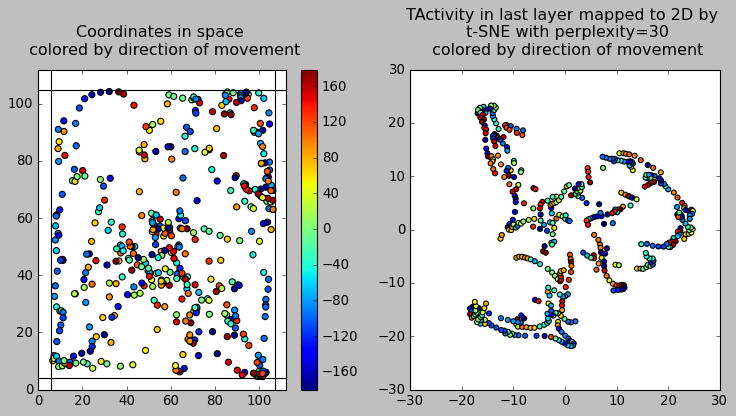

<Figure size 640x480 with 0 Axes>

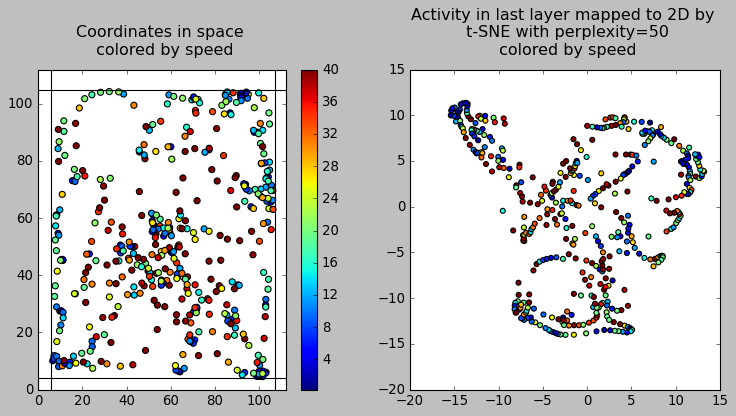

<Figure size 640x480 with 0 Axes>

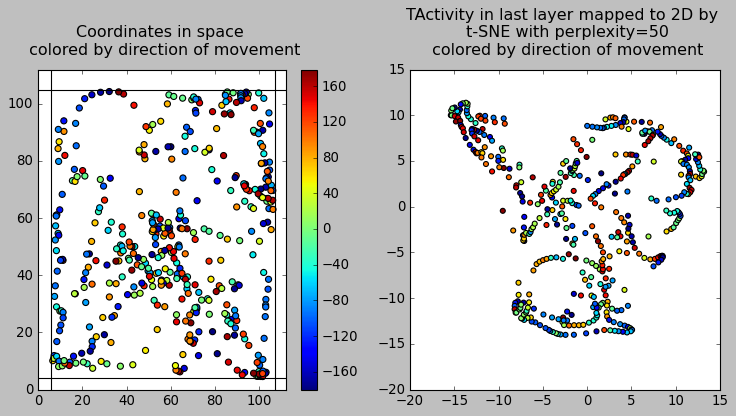

<Figure size 640x480 with 0 Axes>

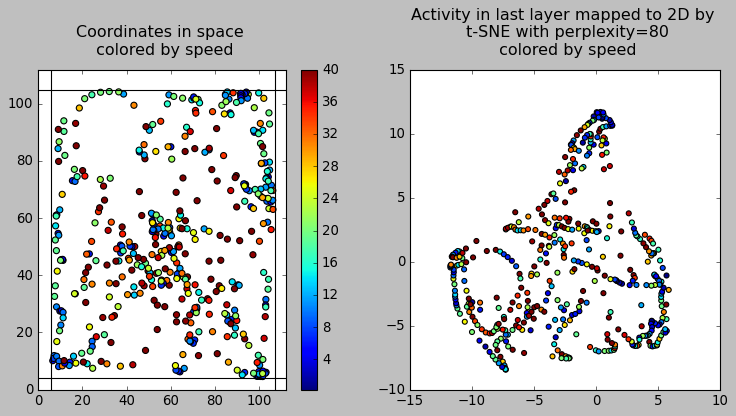

<Figure size 640x480 with 0 Axes>

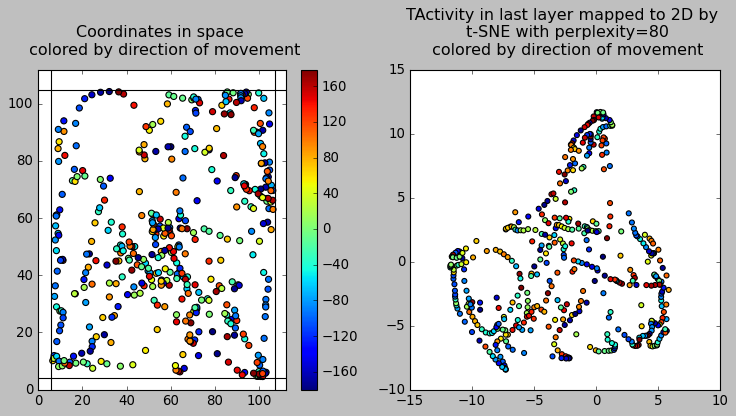

In [11]:

for perplexity in [30, 50, 80]:
    activations_embedded_2D = TSNE(n_components=2, perplexity=perplexity,n_iter=10000).fit_transform(activations_from_one_CV_model)

    plt.clf()
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.scatter(targets_of_fold[:,0], targets_of_fold[:,1], c=speed_clipped, s=30)
    plt.axhline(y=4,color="black")
    plt.axhline(y=105,color="black")
    plt.axvline(x=6,color="black")
    plt.axvline(x=107,color="black")
    plt.xlim([0,112])
    plt.ylim([0,112])
    plt.title("Coordinates in space \n colored by speed",y=1.03)
    plt.colorbar()

    plt.subplot(122)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=speed_clipped)
    plt.title("Activity in last layer mapped to 2D by \n t-SNE with perplexity="+str(perplexity)+ "\n colored by speed",y=1.03)
    plt.show()
    
    
    plt.clf()
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.scatter(targets_of_fold[:,0], targets_of_fold[:,1], c=direction, s=30)
    plt.axhline(y=4,color="black")
    plt.axhline(y=105,color="black")
    plt.axvline(x=6,color="black")
    plt.axvline(x=107,color="black")
    plt.xlim([0,112])
    plt.ylim([0,112])
    plt.title("Coordinates in space \n colored by direction of movement",y=1.03)
    plt.colorbar()

    plt.subplot(122)
    plt.scatter(activations_embedded_2D[:,0], activations_embedded_2D[:,1], c=direction)
    plt.title("TActivity in last layer mapped to 2D by \n t-SNE with perplexity="+str(perplexity)+ "\n colored by direction of movement",y=1.03)
    plt.show()